In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
from helper import *
from load_data import *
from train_models import *
from rankshap import *

In [31]:
with open(join(dir_path, "Experiments/Results/shap_fwers_K2"), "rb") as fp:
    shap_fwers2 = pickle.load(fp)
with open(join(dir_path, "Experiments/Results/shap_fwers_K5"), "rb") as fp:
    shap_fwers5 = pickle.load(fp)

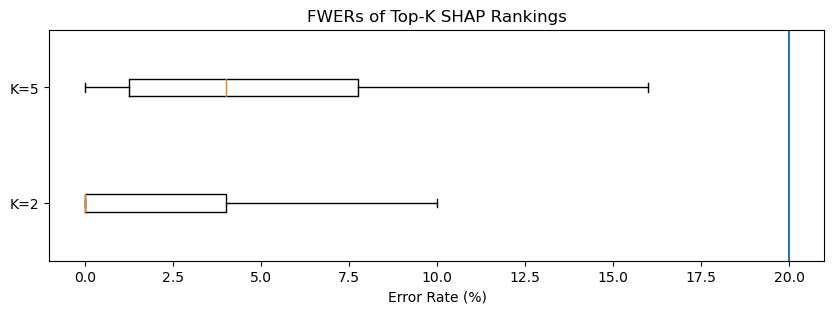

In [32]:
rankshap_fwers = np.array([shap_fwers2, shap_fwers5])*100
labels = ["K=2", "K=5"]
plt.figure(figsize=(10,3))
plt.boxplot(rankshap_fwers.T, vert=False, labels=labels, flierprops={'marker': 'o', 'markerfacecolor':'black'})
plt.axvline(20)
# plt.xlim([0,25])
plt.title("FWERs of Top-K SHAP Rankings")
plt.xlabel("Error Rate (%)")
plt.savefig(join(dir_path, "Experiments", "Figures", "boxplots.png"))
plt.show()

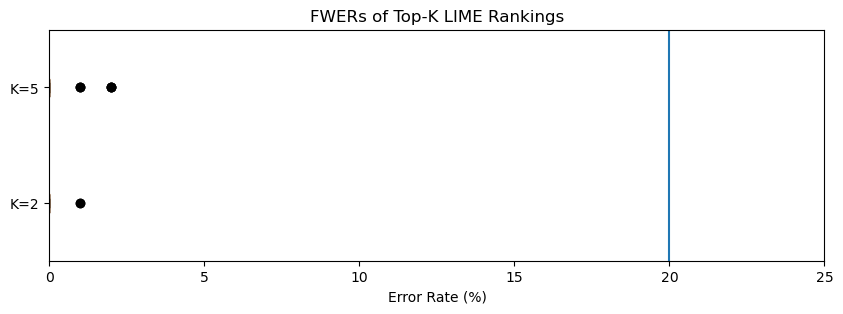

In [33]:
with open(join(dir_path, "Experiments/Results/lime_fwers_K2"), "rb") as fp:
    lime_fwers2 = pickle.load(fp)
with open(join(dir_path, "Experiments/Results/lime_fwers_K5"), "rb") as fp:
    lime_fwers5 = pickle.load(fp)
fwers = np.array([lime_fwers2, lime_fwers5])*100
labels = ["K=2", "K=5"]
plt.figure(figsize=(10,3))
plt.boxplot(fwers.T, vert=False, labels=labels, flierprops={'marker': 'o', 'markerfacecolor':'black'})
plt.axvline(20)
plt.xlim([0,25])
plt.title("FWERs of Top-K LIME Rankings")
plt.xlabel("Error Rate (%)")
plt.savefig(join(dir_path, "Experiments", "Figures", "boxplots.png"))
plt.show()

Fit Shapley sampling values

In [34]:
with open(join(dir_path, "Experiments", "Results", "ss_ranks_k5"), "rb") as fp:
    top_5_ss = np.array(pickle.load(fp))
N_pts = top_5_ss.shape[0]
ss_fwers5 = [calc_fwer(top_5_ss[i]) for i in range(N_pts)]
ss_fwers2 = [calc_fwer(top_5_ss[i, :, :2]) for i in range(N_pts)]

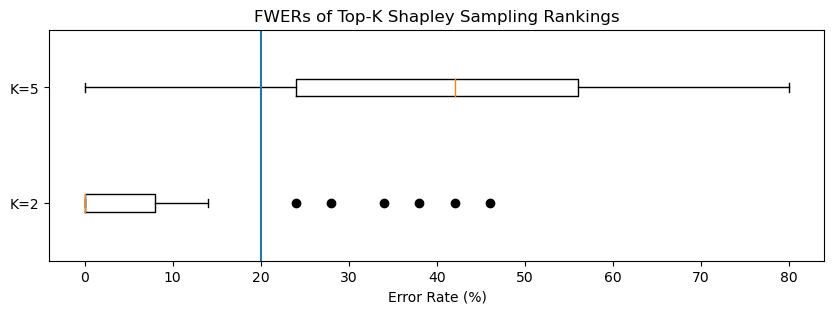

In [35]:
fwers = np.array([ss_fwers2, ss_fwers5])*100
labels = ["K=2", "K=5"]
plt.figure(figsize=(10,3))
plt.boxplot(fwers.T, vert=False, labels=labels, flierprops={'marker': 'o', 'markerfacecolor':'black'})
plt.axvline(20)
# plt.xlim([0,25])
plt.title("FWERs of Top-K Shapley Sampling Rankings")
plt.xlabel("Error Rate (%)")
plt.savefig(join(dir_path, "Experiments", "Figures", "boxplots.png"))
plt.show()

## Combine into one boxplot

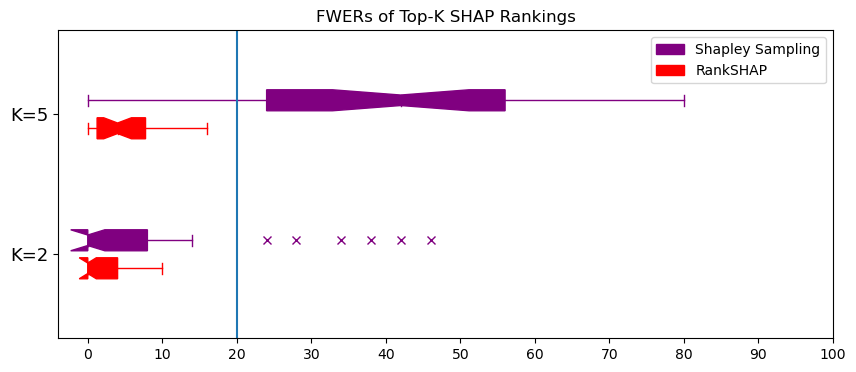

In [38]:
ss_fwers = np.array([ss_fwers2, ss_fwers5])*100
offset = 0.1
c = "red"
plt.figure(figsize=(10,4))
plt.boxplot(rankshap_fwers.T, positions=[1-offset,2-offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )
c = "purple"
plt.boxplot(ss_fwers.T, positions=[1+offset, 2+offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )

import matplotlib.patches as mpatches
colors = ["purple", "red"]
cols = ["Shapley Sampling", "RankSHAP"]
patches = []
for i in range(2):
    patches.append(mpatches.Patch(color=colors[i], label=cols[i]))
plt.legend(handles=patches)

plt.yticks([1,2], ["K=2", "K=5"], size=13)
plt.xticks(np.linspace(0, 100, 11))
plt.axvline(20)
plt.title("FWERs of Top-K SHAP Rankings")
plt.savefig(join(dir_path, "Experiments", "Figures", "shap_boxplots.png"))
plt.show()


In [ ]:
# with open(join(dir_path, "Experiments/Results/shap_vals_k2"), "rb") as fp:
#     vals = pickle.load(fp)
# print(len(vals))
# vals2 = []
# for vals_i in vals:
#     if len(vals_i)==250:
#         vals2.append(vals_i)
# print(len(vals2))
# with open(join(dir_path, "Experiments/Results/shap_vals_k2"), "wb") as fp:
#     pickle.dump(vals2, fp)